# 1. Data Preparation

# 1.1 Download and Read Data

In [ ]:
# Download and unzip data from the website
# Visit the website "https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand" to see the information of the data
!wget https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip
!unzip seoul+bike+sharing+demand.zip

--2025-04-18 17:26:27--  https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seoul+bike+sharing+demand.zip’

seoul+bike+sharing+     [  <=>               ] 590.13K  1.72MB/s    in 0.3s    

2025-04-18 17:26:28 (1.72 MB/s) - ‘seoul+bike+sharing+demand.zip’ saved [604298]

Archive:  seoul+bike+sharing+demand.zip
 extracting: SeoulBikeData.csv       


In [ ]:
# Read .csv file into a DataFrame
import pandas as pd
df = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 1.2 Data Preview

In [ ]:
# Renaming the columns to make the data more easily readable
df.rename(columns = {'Rented Bike Count': 'Rented_bike_count',
                     'Temperature(°C)': 'Temperature',
                     'Humidity(%)': 'Humidity',
                     'Wind speed (m/s)': 'Wind_speed',
                     'Visibility (10m)': 'Visibility',
                     'Dew point temperature(°C)': 'Dew_point_temperature',
                     'Solar Radiation (MJ/m2)': 'Solar_radiation',
                     'Rainfall(mm)': 'Rainfall',
                     'Snowfall (cm)': 'Snowfall',
                     'Functioning Day': 'Functioning_day'}, inplace = True)

df.head()

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Check data types
print('----- Column Information -----')
print(df.info())

----- Column Information -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_bike_count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), 

In [ ]:
# Check missing values
print('----- Rows with Missing Values -----')
print(df.isnull().sum())

----- Rows with Missing Values -----
Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_day          0
dtype: int64


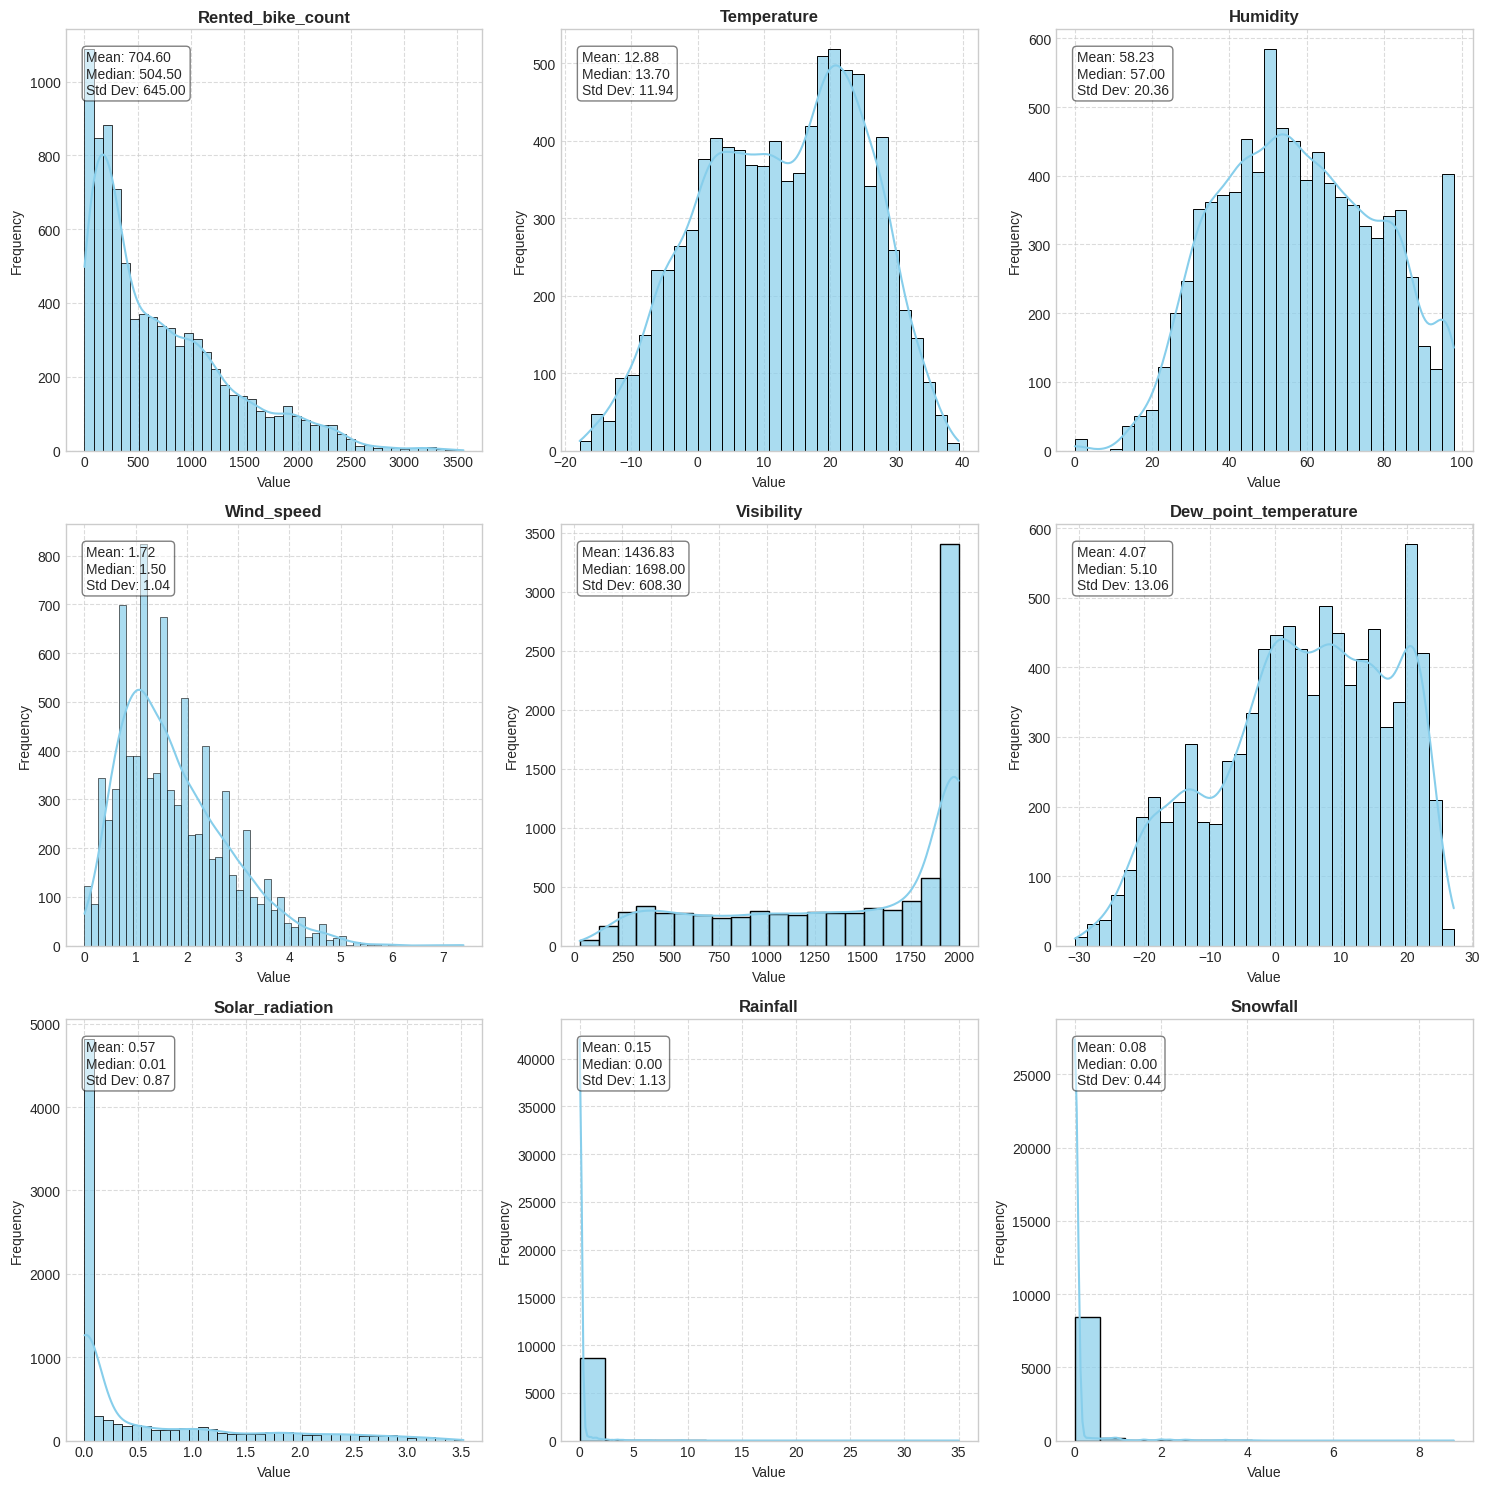

In [ ]:
# Check the distribution of every numeric features

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the columns to visualize
cols = ['Rented_bike_count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility',
       'Dew_point_temperature', 'Solar_radiation', 'Rainfall', 'Snowfall']

# Set the style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure and subplots - 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(cols):
    ax = axes[i]

    # Create histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)

    # Add descriptive statistics
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()

    stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nStd Dev: {std_val:.2f}'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=props)

    # Set title and labels
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

# Optionally save the figure
# plt.savefig('bike_rental_feature_distributions.png', dpi=300, bbox_inches='tight')

# 1.3 Skewness Management

There are some features that exhibit the characteristics of skewness:
1. "Rented_bike_count", "Wind_speed" are right skewed
2. "Solar_radiation", "Rainfall", and "Snowfall" are extremely right skewed
3. "Visibility" is left skewed

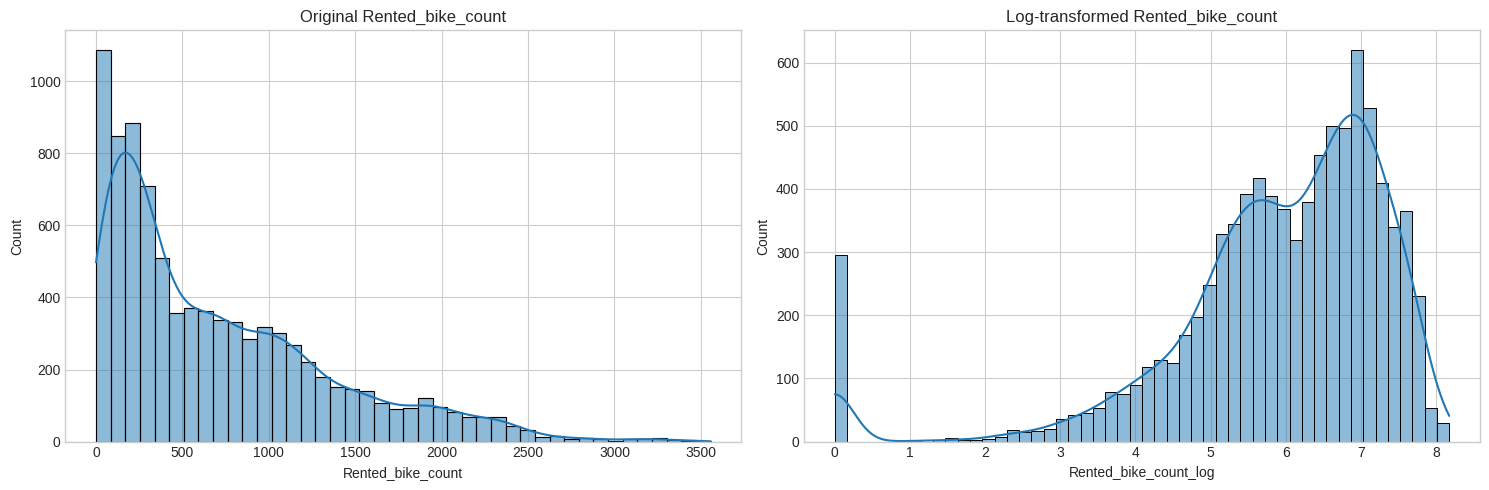

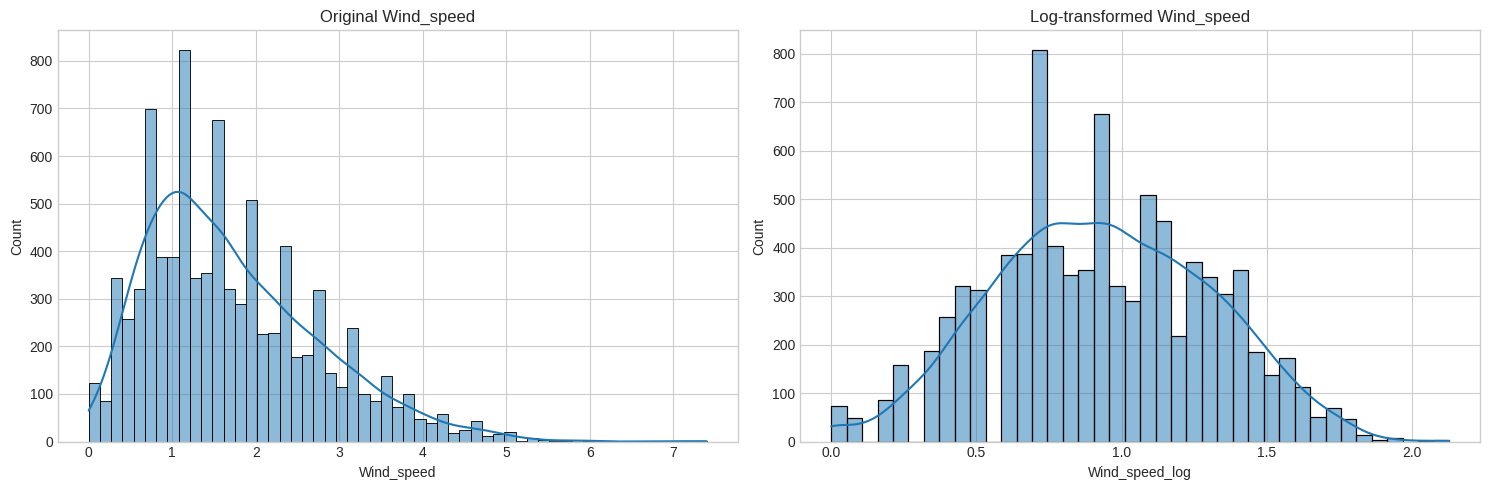

In [ ]:
import numpy as np

# Apply log transformation to 'Rented_bike_count', 'Wind_speed'
features_to_transform = ['Rented_bike_count', 'Wind_speed']

# Create a copy of the dataframe to store transformed values
df_transformed = df.copy()

# Apply log transformation and detect outliers
for feature in features_to_transform:
    # Add a small constant to handle any potential zeros (using log1p) such as Rented_bike_count == 0
    df_transformed[f'{feature}_log'] = np.log1p(df[feature])

    # Visualize before and after transformation
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Original distribution
    sns.histplot(df[feature], kde=True, ax=ax1)
    ax1.set_title(f'Original {feature}')

    # Log-transformed distribution
    sns.histplot(df_transformed[f'{feature}_log'], kde=True, ax=ax2)
    ax2.set_title(f'Log-transformed {feature}')

    plt.tight_layout()
    plt.show()

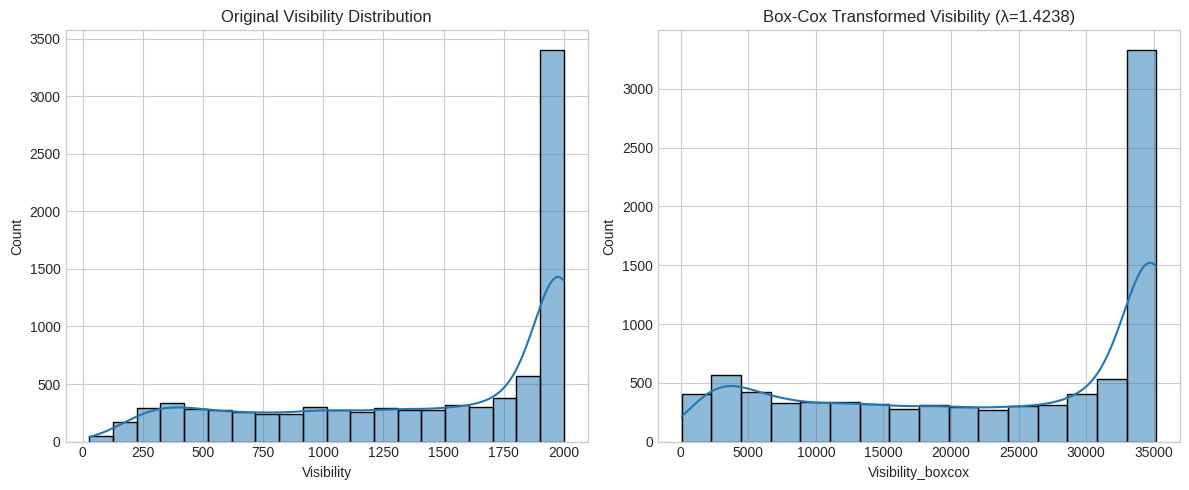

Box-Cox transformation lambda value: 1.4238
Transformation complete. 'Visibility_boxcox' column added to df_transformed.


In [ ]:
from scipy import stats

# Apply Box-Cox transformation to "Visibility"
plt.figure(figsize=(12, 5))

# Plot the original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Visibility'], kde=True)
plt.title('Original Visibility Distribution')

# Apply Box-Cox transformation
visibility_boxcox, lambda_value = stats.boxcox(df['Visibility'])

# Store the transformed values
df_transformed['Visibility_boxcox'] = visibility_boxcox

# Plot the transformed distribution
plt.subplot(1, 2, 2)
sns.histplot(df_transformed['Visibility_boxcox'], kde=True)
plt.title(f'Box-Cox Transformed Visibility (λ={lambda_value:.4f})')

plt.tight_layout()
plt.show()

# Print the lambda value
print(f"Box-Cox transformation lambda value: {lambda_value:.4f}")
print("Transformation complete. 'Visibility_boxcox' column added to df_transformed.")

For variables like "Solar radiation", "Rainfall", "Snowfall", we will convert them into labeled features

# 1.4 Feature Engineering

In [ ]:
# Convert extremely skewed features to binary features
df_processed = df_transformed.copy()

# Create binary features
df_processed['rainfall_binary'] = (df_transformed['Rainfall'] > 0).astype(int)  # 1 if there's any rain, 0 if none
df_processed['snowfall_binary'] = (df_transformed['Snowfall'] > 0).astype(int)  # 1 if there's any snow, 0 if none

# Create multi-level categorical feature for 'Solar_radiation'
# For example, for rainfall:
df_processed['solar_rad_binary_cat'] = pd.cut(df['Solar_radiation'],
                                    bins=[-0.001, 0.0, 1, float('inf')],
                                    labels=False)

# Check the distribution of the new binary features
for col in ['rainfall_binary', 'snowfall_binary', 'solar_rad_binary_cat']:
    count = df_processed[col].value_counts()
    print(f"\n{col} distribution:")
    print(count)
    print(f"Percentage with value 1: {count[1]/len(df)*100:.2f}%")


rainfall_binary distribution:
rainfall_binary
0    8232
1     528
Name: count, dtype: int64
Percentage with value 1: 6.03%

snowfall_binary distribution:
snowfall_binary
0    8317
1     443
Name: count, dtype: int64
Percentage with value 1: 5.06%

solar_rad_binary_cat distribution:
solar_rad_binary_cat
0    4300
1    2385
2    2075
Name: count, dtype: int64
Percentage with value 1: 27.23%


# 1.5 Outlier Management

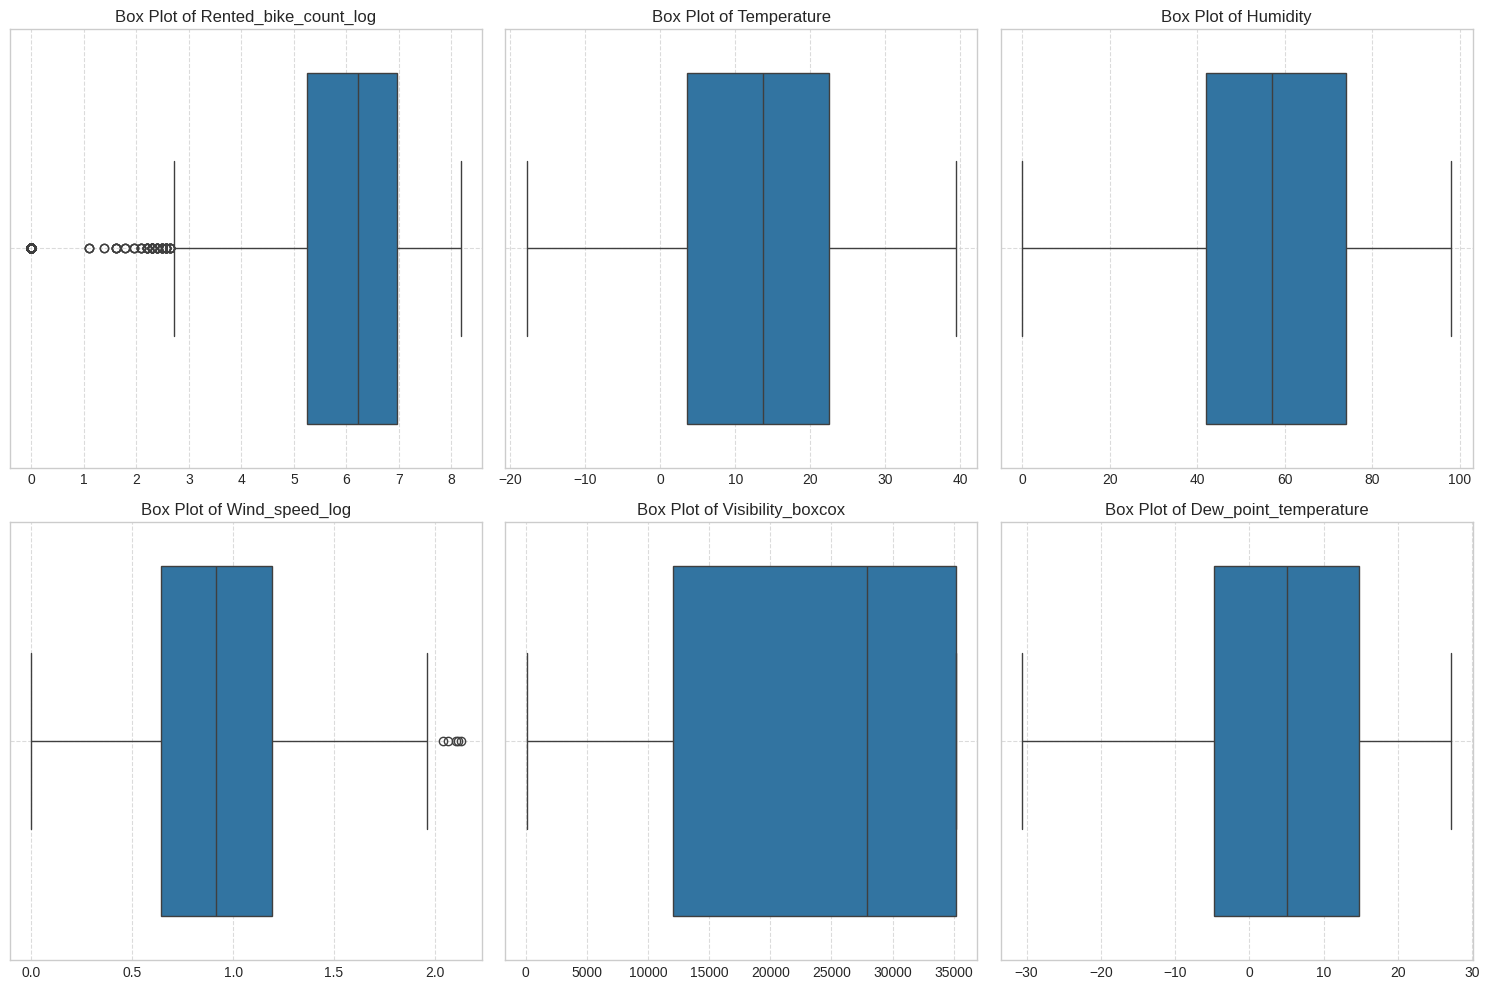

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns to detect outliers
cols_outlier_detect = ['Rented_bike_count_log', 'Temperature', 'Humidity', 'Wind_speed_log', 'Visibility_boxcox', 'Dew_point_temperature']

# Set the grid for box plots
n_features = len(cols_outlier_detect)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

# Create a box plot for each feature
for i, col in enumerate(cols_outlier_detect):
    if i < len(axes):
        sns.boxplot(x=df_processed[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel('')

        axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    if j < len(axes):  # Additional check to handle single subplot case
        fig.delaxes(axes[j])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


  Functioning Day  Sample Count  Average Bike Rent
0              No           295           0.000000
1             Yes          8465         729.156999


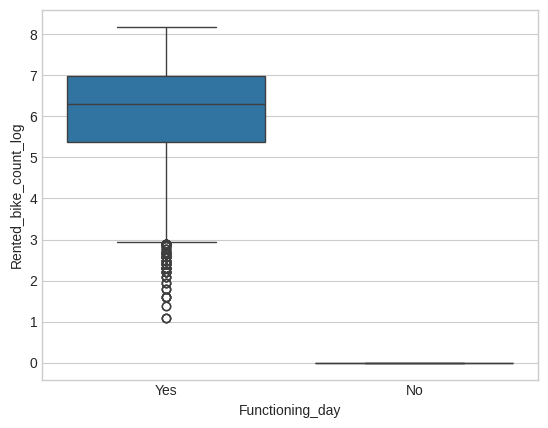

In [ ]:
sns.boxplot(x='Functioning_day', y='Rented_bike_count_log', data=df_processed)
summary = df_processed.groupby('Functioning_day')['Rented_bike_count'].agg(['count', 'mean']).reset_index()
summary.columns = ['Functioning Day', 'Sample Count', 'Average Bike Rent']
print(summary)


Items with Rented_bike_count = 0 present like outliers. However, Rented_bike_count = 0 is highly related to Functioning_day = 'no'.
Therefore, Rented_bike_count = 0 cannot be treat as outliers.

Handle the outliers in "Wind_speed_log"





In [ ]:
import scipy.stats as stats
import numpy as np

# Calculate Z-scores
z_scores_wind = stats.zscore(df_processed['Wind_speed_log'])

# Define threshold
threshold = 3

# Identify outliers
outliers_mask_wind = np.abs(z_scores_wind) > threshold

# Count outliers
num_outliers_wind = np.sum(outliers_mask_wind)
print(f"Number of outliers in Wind_speed_log detected: {num_outliers_wind}")

# Filter data to remove outliers
df_filtered = df_processed[~outliers_mask_wind]

Number of outliers in Wind_speed_log detected: 4


# 1.6 Categorical Data Convertion

In [ ]:
# Apply one-hot encoding to Multi-categorical features and covert boolean types to integer '0' and '1'

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_encoded = df_filtered.copy()

# One-hot encoding for 'Seasons'
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_seasons = encoder.fit_transform(df_encoded[['Seasons']])
encoded_df = pd.DataFrame(encoded_seasons, columns=encoder.get_feature_names_out(['Seasons']), index=df_encoded.index)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded.drop('Seasons', axis=1, inplace=True)  # Remove original 'Seasons'

# Convert other categorical features to numeric (0/1)
functioning_day_mapping = {"No": 0, "Yes": 1}
holiday_mapping = {"No Holiday": 0, "Holiday": 1}

# Apply these mappings to the data frame
df_encoded["Functioning_day"] = df_encoded["Functioning_day"].map(functioning_day_mapping)
df_encoded["Holiday"] = df_encoded["Holiday"].map(holiday_mapping)

# Convert boolean columns to integers
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(df_encoded.dtypes)
print(df_encoded.head())

Date                      object
Rented_bike_count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_radiation          float64
Rainfall                 float64
Snowfall                 float64
Holiday                    int64
Functioning_day            int64
Rented_bike_count_log    float64
Wind_speed_log           float64
Visibility_boxcox        float64
rainfall_binary            int64
snowfall_binary            int64
solar_rad_binary_cat       int64
Seasons_Spring           float64
Seasons_Summer           float64
Seasons_Winter           float64
dtype: object
         Date  Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                

In [ ]:
# Drop original features

columns_to_drop = ['Date', 'Rented_bike_count', 'Wind_speed', 'Visibility', 'Solar_radiation', 'Rainfall', 'Snowfall']
df_encoded.drop(columns = columns_to_drop, inplace = True)

# 1.7 Standardization

In [ ]:
#Standardizing numeric features
from sklearn.preprocessing import StandardScaler

features_to_standardize = ['Hour', 'Temperature', 'Humidity', 'Dew_point_temperature', 'Wind_speed_log', 'Visibility_boxcox', 'solar_rad_binary_cat']

# Fit the scaler to the selected features and transform them
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_encoded[features_to_standardize])

# Create a new DataFrame with the standardized features
standardized_df = pd.DataFrame(standardized_features, columns=features_to_standardize, index=df_encoded.index)

# Get the list of columns that were not standardized
other_features = [col for col in df_encoded.columns if col not in features_to_standardize]

# Create a new DataFrame by concatenating the standardized features and other features
df_cleaned = pd.concat([standardized_df, df_encoded[other_features]], axis=1)

# Display the new DataFrame
df_cleaned.head()


,Hour,Temperature,Humidity,Dew_point_temperature,Wind_speed_log,Visibility_boxcox,solar_rad_binary_cat,Holiday,Functioning_day,Rented_bike_count_log,rainfall_binary,snowfall_binary,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,-1.661150,-1.513480,-1.042401,-1.659148,0.619030,0.978172,-0.916038,0,1,5.541264,0,0,0.0,0.0,1.0
1,-1.516686,-1.538595,-0.993293,-1.659148,-0.924476,0.978172,-0.916038,0,1,5.323010,0,0,0.0,0.0,1.0
2,-1.372223,-1.580451,-0.944186,-1.666805,-0.641829,0.978172,-0.916038,0,1,5.159055,0,0,0.0,0.0,1.0
3,-1.227759,-1.597194,-0.895078,-1.659148,-0.779432,0.978172,-0.916038,0,1,4.682131,0,0,0.0,0.0,1.0
4,-1.083296,-1.580451,-1.091508,-1.735711,0.701580,0.978172,-0.916038,0,1,4.369448,0,0,0.0,0.0,1.0


# 2. Linear Model Building

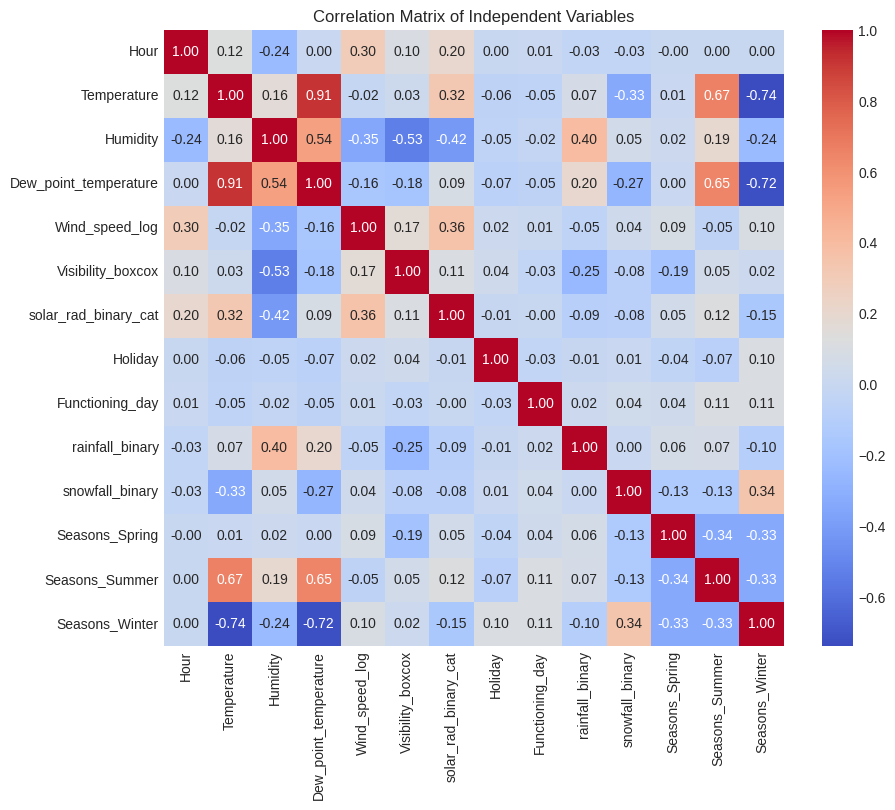

In [ ]:
# Detect Multicollinearity between X features

X_features = df_cleaned.drop('Rented_bike_count_log', axis=1)

# Calculate the correlation matrix
correlation_matrix = X_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Independent Variables')
plt.show()

1. Dew_point_temperature is highly correlated with Temperature
2. Seaons (Summer & Winter) is highly correlated with Temperature

In [ ]:
# Remove features to avoid Multicollinearity

df_independent = df_cleaned.drop(['Dew_point_temperature', 'Seasons_Summer', 'Seasons_Winter', 'Seasons_Spring'], axis=1)

In [ ]:
# Build linear regression model using forward selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = df_independent.drop('Rented_bike_count_log', axis=1)  # Independent variables
y = df_independent['Rented_bike_count_log']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function for forward selection
def forward_selection(X, y):
    initial_features = []
    best_features = []
    remaining_features = list(X.columns)

    while remaining_features:
        best_pvalue = 1.0  # Initialize with a large p-value
        best_feature = None

        for feature in remaining_features:
            # Create a model with current features + new feature
            features = initial_features + [feature]
            X_subset = X[features]
            # Convert X_subset to numeric, handling errors
            X_subset = X_subset.apply(pd.to_numeric, errors='coerce').fillna(0)
            X_subset = sm.add_constant(X_subset)  # Add constant for intercept
            model = sm.OLS(y, X_subset).fit()

            # Check p-value of the new feature
            pvalue = model.pvalues[feature]

            # Update best feature if p-value is lower
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature

        # Add best feature if p-value is below threshold (e.g., 0.05)
        if best_pvalue < 0.05:
            initial_features.append(best_feature)
            best_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break  # Stop if no more significant features are found

    return best_features

# Apply forward selection to get selected features
selected_features = forward_selection(X_train, y_train)

# Train the final model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected = sm.add_constant(X_train_selected) # Add a constant for the intercept term
X_test_selected = sm.add_constant(X_test_selected) # Add a constant for the intercept term


# Use statsmodels.OLS for the final model to get the summary
model = sm.OLS(y_train, X_train_selected).fit()

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Selected Features: {selected_features}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(model.params)

Selected Features: ['Functioning_day', 'Temperature', 'Humidity', 'rainfall_binary', 'Hour', 'Holiday', 'solar_rad_binary_cat', 'Visibility_boxcox', 'Wind_speed_log', 'snowfall_binary']
Mean Squared Error: 0.48590452686101626
R-squared: 0.7948052454326596
const                  -0.064700
Functioning_day         6.287655
Temperature             0.609237
Humidity               -0.138944
rainfall_binary        -1.641041
Hour                    0.294032
Holiday                -0.400969
solar_rad_binary_cat    0.089900
Visibility_boxcox       0.055199
Wind_speed_log         -0.045053
snowfall_binary        -0.157738
dtype: float64


# 3. Tree Model Building

# 3.1 Encoding and Feature Engeering

In [ ]:
# Apply one-hot encoding to Multi-categorical features and covert boolean types to integer '0' and '1'

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df_tree_encoded = df.copy()

# One-hot encoding for 'Seasons'
tree_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
tree_encoded_seasons = tree_encoder.fit_transform(df_tree_encoded[['Seasons']])
tree_encoded_df = pd.DataFrame(tree_encoded_seasons, columns=tree_encoder.get_feature_names_out(['Seasons']), index=df_tree_encoded.index)
df_tree_encoded = pd.concat([df_tree_encoded, tree_encoded_df], axis=1)
df_tree_encoded.drop('Seasons', axis=1, inplace=True)

# Convert other categorical features to numeric (0/1)
functioning_day_mapping = {"No": 0, "Yes": 1}
holiday_mapping = {"No Holiday": 0, "Holiday": 1}

# Apply these mappings to the data frame
df_tree_encoded["Functioning_day"] = df_tree_encoded["Functioning_day"].map(functioning_day_mapping)
df_tree_encoded["Holiday"] = df_tree_encoded["Holiday"].map(holiday_mapping)


print(df_tree_encoded.dtypes)
print(df_tree_encoded.head())

Date                      object
Rented_bike_count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_radiation          float64
Rainfall                 float64
Snowfall                 float64
Holiday                    int64
Functioning_day            int64
Seasons_Spring           float64
Seasons_Summer           float64
Seasons_Winter           float64
dtype: object
         Date  Rented_bike_count  Hour  Temperature  Humidity  Wind_speed  \
0  01/12/2017                254     0         -5.2        37         2.2   
1  01/12/2017                204     1         -5.5        38         0.8   
2  01/12/2017                173     2         -6.0        39         1.0   
3  01/12/2017                107     3         -6.2        40         0.9   
4  01/12/2017                 78     4         -6.0        36         2.3

In [ ]:
# Convert extremely skewed features to binary features
df_tree_processed = df_tree_encoded.copy()

# Create binary features
df_tree_processed['rainfall_binary'] = (df_tree_encoded['Rainfall'] > 0).astype(int)  # 1 if there's any rain, 0 if none
df_tree_processed['snowfall_binary'] = (df_tree_encoded['Snowfall'] > 0).astype(int)  # 1 if there's any snow, 0 if none

# Create multi-level categorical feature for 'Solar_radiation'
# For example, for rainfall:
df_tree_processed['solar_rad_binary_cat'] = pd.cut(df['Solar_radiation'],
                                    bins=[-0.001, 0.0, 1, float('inf')],
                                    labels=False)

# Check the distribution of the new binary features
for col in ['rainfall_binary', 'snowfall_binary', 'solar_rad_binary_cat']:
    count = df_tree_processed[col].value_counts()
    print(f"\n{col} distribution:")
    print(count)
    print(f"Percentage with value 1: {count[1]/len(df)*100:.2f}%")


rainfall_binary distribution:
rainfall_binary
0    8232
1     528
Name: count, dtype: int64
Percentage with value 1: 6.03%

snowfall_binary distribution:
snowfall_binary
0    8317
1     443
Name: count, dtype: int64
Percentage with value 1: 5.06%

solar_rad_binary_cat distribution:
solar_rad_binary_cat
0    4300
1    2385
2    2075
Name: count, dtype: int64
Percentage with value 1: 27.23%


# 3.2 Decision Trees Model

Decision Tree Model:
  MSE: 126911.0485
  MAE: 200.0542
  R-squared: 0.6954
--------------------
Random Forest Model:
  MSE: 57784.8528
  MAE: 144.8560
  R-squared: 0.8613
--------------------
XGBoost Model:
  MSE: 58031.9688
  MAE: 149.8040
  R-squared: 0.8607
--------------------


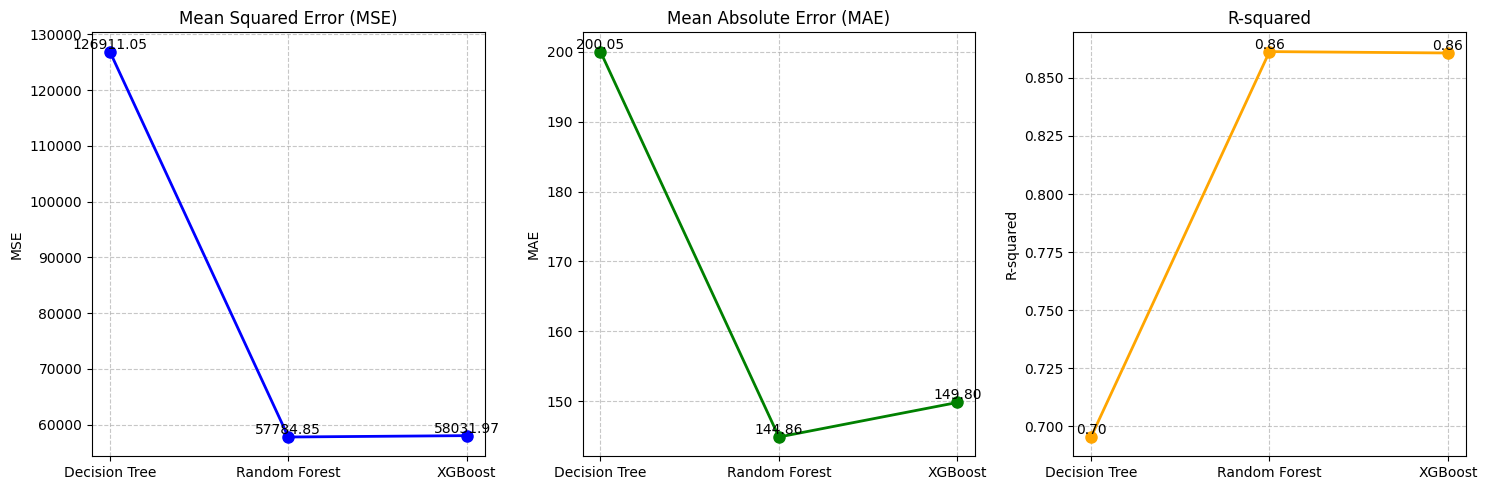

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'df_tree_processed' is DataFrame and 'Rented_bike_count' is the target variable
X = df_tree_processed.drop(['Date', 'Rented_bike_count'], axis=1)
y = df_tree_processed['Rented_bike_count']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree (Baseline)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Store metrics in a dictionary
    metrics = {'MSE': mse, 'MAE': mae, 'R-squared': r2}

    # Print metrics
    print(f"{model_name} Model:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("-" * 20)

    return metrics

# Evaluate models and store metrics
dt_metrics = evaluate_model(y_test, dt_pred, "Decision Tree")
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")
xgb_metrics = evaluate_model(y_test, xgb_pred, "XGBoost")

# Visualization with data point values
models = ['Decision Tree', 'Random Forest', 'XGBoost']
mse_values = [dt_metrics['MSE'], rf_metrics['MSE'], xgb_metrics['MSE']]
mae_values = [dt_metrics['MAE'], rf_metrics['MAE'], xgb_metrics['MAE']]
r2_values = [dt_metrics['R-squared'], rf_metrics['R-squared'], xgb_metrics['R-squared']]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MSE plot with values
axes[0].plot(models, mse_values, 'o-', color='blue', linewidth=2, markersize=8)
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')
axes[0].grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(mse_values):
    axes[0].text(models[i], value, f'{value:.2f}', ha='center', va='bottom')

# MAE plot with values
axes[1].plot(models, mae_values, 'o-', color='green', linewidth=2, markersize=8)
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
axes[1].grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(mae_values):
    axes[1].text(models[i], value, f'{value:.2f}', ha='center', va='bottom')

# R-squared plot with values
axes[2].plot(models, r2_values, 'o-', color='orange', linewidth=2, markersize=8)
axes[2].set_title('R-squared')
axes[2].set_ylabel('R-squared')
axes[2].grid(True, linestyle='--', alpha=0.7)
for i, value in enumerate(r2_values):
    axes[2].text(models[i], value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()